<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Lab: Regressão Linear**

## imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.formula.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Ex1. Vanilla `statsmodels` I (2.5)

Faça um modelo de regressão linear para estimar os valores de `body_mass_g` com base nos demais atributos **numéricos** (considere todas as variáveis independente do $p-value$ indicar o atributo significativo ou não). Com o modelo obtido faça a predição do peso (`body_mass_g`) de pinguins com as seguintes medidas:

```
bill_length_mm	bill_depth_mm	flipper_length_mm
      38	           17	             190
      40	           21	             198
```

**nota**: Lembre-se de verificar a presença de valores nulos, excluindo quaisquer linhas com quaisquer valores ausentes.

In [3]:
df.isnull().sum() / len(df)

,0
species,0.000000
island,0.000000
bill_length_mm,0.005814
bill_depth_mm,0.005814
flipper_length_mm,0.005814
body_mass_g,0.005814
sex,0.031977


In [4]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [6]:
print('Before',len(df))
df = df.dropna()
print('After',len(df))

Before 344
After 333


In [7]:
df.isnull().sum()

,0
species,0
island,0
bill_length_mm,0
bill_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


In [8]:
import statsmodels.formula.api as sm

# Definição do modelo
lm = sm.ols(formula='body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm', data=df)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())
df_case = pd.DataFrame({'bill_length_mm':[38,40], 'bill_depth_mm':[17,21], 'flipper_length_mm':[190,198]})
lm.predict(df_case)

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          9.26e-103
Time:                        19:58:38   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.13

,0
0,3627.676399
1,4111.704741


# Ex2. Vanilla `statsmodels` II (2.5)

Faça um modelo de regressão linear para estimar os valores de `body_mass_g` com base em **todos os atributos preditores significativos**. Com o modelo  obtido faça a predição do peso (`body_mass_g`) de um pinguim do sexo feminino, da especie Adelie e da ilha de Torgersen cujas as demais medidas são a média da medidas de sua espécie e sexo.



In [10]:
import statsmodels.formula.api as sm

# Definição do modelo
lm = sm.ols(formula='body_mass_g ~ species + island + bill_length_mm + bill_depth_mm + flipper_length_mm + sex', data=df)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     284.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.85e-141
Time:                        20:04:47   Log-Likelihood:                -2353.6
No. Observations:                 333   AIC:                             4725.
Df Residuals:                     324   BIC:                             4760.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1500.0291 

In [11]:

parametros = pd.DataFrame()
parametros["parametros"] = lm.pvalues
parametros["ABS"] = parametros.abs()
parametros = parametros.sort_values(by="ABS", ascending=False)
parametros["SIGNIFICATIVO"] = parametros["ABS"] < 0.05
parametros


,parametros,ABS,SIGNIFICATIVO
island[T.Dream],8.230321e-01,8.230321e-01,False
island[T.Torgersen],4.307221e-01,4.307221e-01,False
bill_length_mm,1.126981e-02,1.126981e-02,True
Intercept,9.610484e-03,9.610484e-03,True
species[T.Chinstrap],3.522124e-03,3.522124e-03,True
bill_depth_mm,7.337653e-04,7.337653e-04,True
flipper_length_mm,6.801240e-08,6.801240e-08,True
species[T.Gentoo],4.299347e-12,4.299347e-12,True
sex[T.Male],1.655310e-14,1.655310e-14,True


In [12]:
import statsmodels.formula.api as sm

# Definição do modelo
lm = sm.ols(formula='body_mass_g ~ species + bill_length_mm + bill_depth_mm + flipper_length_mm + sex', data=df)

# Treinamento
lm = lm.fit()

# Resultados
print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     380.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.82e-144
Time:                        20:06:15   Log-Likelihood:                -2354.0
No. Observations:                 333   AIC:                             4722.
Df Residuals:                     326   BIC:                             4749.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1460.9946 

In [13]:

parametros = pd.DataFrame()
parametros["parametros"] = lm.pvalues
parametros["ABS"] = parametros.abs()
parametros = parametros.sort_values(by="ABS", ascending=False)
parametros["SIGNIFICATIVO"] = parametros["ABS"] < 0.05
parametros


,parametros,ABS,SIGNIFICATIVO
Intercept,1.100170e-02,1.100170e-02,True
bill_length_mm,1.086405e-02,1.086405e-02,True
species[T.Chinstrap],2.092677e-03,2.092677e-03,True
bill_depth_mm,7.447574e-04,7.447574e-04,True
flipper_length_mm,8.440786e-08,8.440786e-08,True
species[T.Gentoo],6.852265e-14,6.852265e-14,True
sex[T.Male],7.971622e-15,7.971622e-15,True


In [15]:
AdelieFem = df[df.species.isin(["Adelie"]) & df.sex.isin(["Female"]) ]

In [16]:
AdelieFem_case = pd.DataFrame({'bill_length_mm':[AdelieFem.bill_length_mm.mean()], 'bill_depth_mm':[AdelieFem.bill_depth_mm.mean()], 'flipper_length_mm':[AdelieFem.flipper_length_mm.mean()],'sex':["Female"],'species':["Adelie"],'island':["Torgersen"]})
lm.predict(AdelieFem_case)

,0
0,3397.130037


# Ex3. `scikit-learn` (2.5)

Faça um modelo de regressão linear, agora empregando o `scikit-learn`, **idêntico ao modelo final obtido no exercício anterior, EXCETO que você deve excluir nesse modelo o intercept.** Obtenha o R2 e o valor previsto para o mesmo caso do exercício anterior.

Nota: lembre-se que os resultados, por conta do intercept, divergem e você deverá mesmo fazer o uso do `scikit-learn`.


In [17]:
for coluna in df.columns:
  print(coluna)
  print(df[coluna].unique())

species
['Adelie' 'Chinstrap' 'Gentoo']
island
['Torgersen' 'Biscoe' 'Dream']
bill_length_mm
[39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 34.6 36.6 38.7 42.5 34.4
 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9 36.4 42.2
 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 42.3 40.1 35.  42.  34.5 41.4
 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1 42.9 35.1
 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2 35.2 41.5
 38.5 43.1 36.8 37.5 35.6 32.1 40.7 46.5 50.  51.3 45.4 52.7 45.2 46.1
 46.6 51.7 47.  52.  45.9 50.5 50.3 58.  46.4 49.2 42.4 48.5 50.6 46.7
 49.5 52.8 54.2 51.  49.7 47.5 47.6 46.9 53.5 49.  46.2 50.9 45.5 50.8
 50.1 51.5 49.8 48.1 51.4 45.7 50.7 52.2 49.3 50.2 51.9 46.8 55.8 43.5
 49.6 48.7 43.3 48.4 45.1 46.3 47.8 48.2 47.3 59.6 49.1 42.6 44.4 44.
 45.3 43.6 44.9 45.  43.8 50.4 54.3 47.7 48.6 51.1 52.5 47.4 43.4 52.1
 44.5 49.4 55.9 47.2 41.7 53.4 55.1 48.8 49.9]
bill_depth_mm
[18.7 17.4 18.  19.3 20.6 17.8 19.6 17.6 21.2 21.1 19.  20.7 18.4 

In [18]:
df["Adelie"] = df.species == "Adelie"
# df["Chinstrap"] = df.species == "Chinstrap"
df["Gentoo"] = df.species == "Gentoo"

In [19]:
# ['Torgersen' 'Biscoe' 'Dream']
# df["Biscoe"] = df.island == "Biscoe"
df["Dream"] = df.island == "Dream"
df["Torgersen"] = df.island == "Torgersen"

In [20]:
# ['Male' 'Female']
df["Male"] = df.sex == "Male"

In [21]:
from sklearn import linear_model


x = df.drop(columns=["body_mass_g","island","species","sex"])
y = df.body_mass_g
reg = linear_model.LinearRegression(fit_intercept = False)
reg.fit(x, y)
AdelieFem_case = pd.DataFrame({'bill_length_mm':[AdelieFem.bill_length_mm.mean()], 'bill_depth_mm':[AdelieFem.bill_depth_mm.mean()], 'flipper_length_mm':[AdelieFem.flipper_length_mm.mean()],'Adelie':[True],'Gentoo':[False],'Dream':[False],'Torgersen':[True],'Male':[False]})

y_pred = reg.predict(AdelieFem_case)
print(f'Preço estimado (US$ 1000): {y_pred[0]:.2f}')

Preço estimado (US$ 1000): 3374.86


In [26]:

print("Score (R2): ", reg.score(x, y)) # R2

Score (R2):  0.8720024773532022


In [23]:
print("Coeficientes: ", dict(zip(reg.feature_names_in_, reg.coef_)))


Coeficientes:  {'bill_length_mm': 12.444818988135676, 'bill_depth_mm': 48.745845258567684, 'flipper_length_mm': 10.336493366977038, 'Adelie': 149.1083198217481, 'Gentoo': 1280.5003124685504, 'Dream': -28.40232719919959, 'Torgersen': -38.04846603966954, 'Male': 474.9966389153872}


# Ex4. Erro e Resíduos (2.5)

Empregue o **mesmo modelo final do exercício Ex2.**

a. Calcule o MAPE e o RMSE do modelo sobre o conjunto total de dados

b. Os resíduos são o erro de previsão do modelo sem quaisquer transformações:

$$ Res_i = y_i - \hat{y_i} $$

Verifique graficamente se os resíduos têm distribuição normal.

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_metrics(y_true, y_pred):
    metrics = {}

    # Mean Squared Error (MSE)
    metrics['MSE'] = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Mean Absolute Percentage Error (MAPE)
    if np.any(y_true == 0):
        metrics['MAPE'] = 'Undefined (division by zero)'
    else:
        metrics['MAPE'] = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    # Mean Absolute Error (MAE)
    metrics['MAE'] = mean_absolute_error(y_true, y_pred)

    # Symmetric Mean Absolute Percentage Error (sMAPE)
    metrics['sMAPE'] = 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

    # Mean Absolute Deviation (MAD)
    metrics['MAD'] = np.mean(np.abs(y_true - np.mean(y_true)))

    for key, value in metrics.items():
        print(f"{key}: {value:.2f}")

    return metrics

# calculate_metrics(y_true, y_pred)


In [29]:
calculate_metrics(df.body_mass_g, reg.predict(df.drop(columns=["body_mass_g","island","species","sex"])))


MSE: 82740.85
RMSE: 287.65
MAPE: 5.65
MAE: 228.32
sMAPE: 5.60
MAD: 679.89


{'MSE': 82740.85274178546,
 'RMSE': 287.64709757232987,
 'MAPE': 5.645942332335314,
 'MAE': 228.3176207141703,
 'sMAPE': 5.6025598605494675,
 'MAD': 679.8902506109714}

In [31]:
y_true = df.body_mass_g
y_pred = reg.predict(df.drop(columns=["body_mass_g","island","species","sex"]))

In [33]:
metrics = {}

metrics['MAPE'] = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [34]:
    # Mean Squared Error (MSE)
metrics['MSE'] = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
metrics['RMSE'] = np.sqrt(metrics['MSE'])

In [35]:
metrics

{'MAPE': 5.645942332335314,
 'MSE': 82740.85274178546,
 'RMSE': 287.64709757232987}

In [36]:
residuos = df.body_mass_g - reg.predict(df.drop(columns=["body_mass_g","island","species","sex"]))

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  1.,  0.,  1.,  3.,  1.,
         1.,  1.,  0.,  0.,  6.,  3.,  1.,  2.,  0.,  3.,  6.,  4.,  3.,
         2.,  4.,  4.,  6.,  5.,  7.,  3.,  6.,  3.,  7., 10.,  6.,  6.,
         7.,  7., 12.,  6., 10.,  7.,  9.,  9.,  8.,  9.,  6.,  7.,  9.,
         9.,  9.,  5.,  4.,  4.,  4.,  0.,  8.,  4.,  3.,  7.,  7.,  6.,
         5.,  4.,  7.,  3.,  5.,  1.,  2.,  3.,  2.,  1.,  0.,  2.,  2.,
         1.,  2.,  1.,  0.,  0.,  2.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-783.77480529, -766.86789651, -749.96098773, -733.05407896,
        -716.14717018, -699.2402614 , -682.33335263, -665.42644385,
        -648.51953507, -631.6126263 , -614.70571752, -597.79880874,
        -580.89189997, -563.98499119, -547.07808241, -530.17117364,
        -513.26426486, -496.35735608, -479.45044731, -462.54353853,
        -445.63662975, -428.72972098, -411.8228122 , -394.91590343,
        -378.00899465, -36

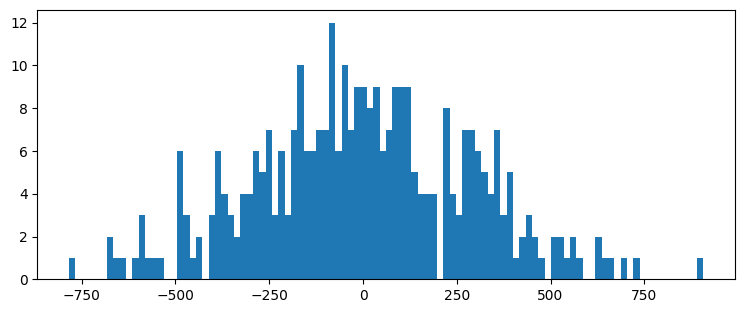

In [39]:
plt.figure(figsize=(9,3.5))

plt.hist(residuos, bins=100) # bins numero de colunas


In [41]:

# plt.hist(residuos, density=True, cumulative=True, bins=20)

# Ex5. Diferentes modelos (1.0)

Compare o modelo linear do Ex3. (**considere agora o modelo linear com o intercept**) com os modelos robustos e outros dois modelos de regressão não linear do `scikit-learn`, o `SVR` e o `Ridge`. Quais desses modelos apresenta valores de R2 e um erro (RMSE) melhores que da regressão linear?

In [48]:
from sklearn import linear_model


x = df.drop(columns=["body_mass_g","island","species","sex"])
y = df.body_mass_g
reg = linear_model.LinearRegression()
reg.fit(x, y)
AdelieFem_case = pd.DataFrame({'bill_length_mm':[AdelieFem.bill_length_mm.mean()], 'bill_depth_mm':[AdelieFem.bill_depth_mm.mean()], 'flipper_length_mm':[AdelieFem.flipper_length_mm.mean()],'Adelie':[True],'Gentoo':[False],'Dream':[False],'Torgersen':[True],'Male':[False]})

y_pred =  reg.predict(df.drop(columns=["body_mass_g","island","species","sex"]))
print(f'Preço estimado (US$ 1000): {y_pred[0]:.2f}')
print("Coeficientes: ", dict(zip(reg.feature_names_in_, reg.coef_)))



Preço estimado (US$ 1000): 3753.16
Coeficientes:  {'bill_length_mm': 18.189315088934812, 'bill_depth_mm': 67.57542918866558, 'flipper_length_mm': 16.23850616659588, 'Adelie': 260.306294552343, 'Gentoo': 1248.0677395546431, 'Dream': -13.103051308900538, 'Torgersen': -48.063625808092475, 'Male': 387.22425529644283}


In [55]:
print("Intercept: ", reg.intercept_)
print("Score (R2): ", reg.score(x, y)) # R2
print()

Intercept:  -1760.3353900443071
Score (R2):  0.875223107235797



In [53]:
    # Mean Squared Error (MSE)
metrica= {}
metrica['MSE'] = mean_squared_error(y,y_pred )

    # Root Mean Squared Error (RMSE)
metrica['RMSE'] = np.sqrt(metrics['MSE'])

In [54]:
metrica

{'MSE': 80658.95570705224, 'RMSE': 284.0052036619263}

In [56]:
 np.sqrt(mean_squared_error(y,y_pred )

284.0052036619263

In [64]:
from sklearn.svm import SVR
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
# from sklearn.ensemble import Ridge
from sklearn.neural_network import MLPRegressor # entradas precisam ser normalizadas


# Quais dos modelos apresenta valores de R2 e um erro (RMSE) melhores que da regressão linear?


# SVR

# HuberRegressor

# RANSACRegressor

# TheilSenRegressor

# Ridge

# Nenhum dos modelos


from sklearn.linear_model import (LinearRegression, HuberRegressor,
                                  RANSACRegressor, TheilSenRegressor)

X_train = X_test = df.drop(columns=["body_mass_g","island","species","sex"])
y_train = df.body_mass_g
base_estimators = [ #Ridge(),
                    SVR(),
                    HuberRegressor(),
                    RANSACRegressor(),
                    TheilSenRegressor()]


for regressor in base_estimators:

  regressor.fit(X_train, y_train)

  y_pred = regressor.predict(X_test)

  print(str(regressor))
  print( np.sqrt(mean_squared_error(y,y_pred )))
  print("Score (R2): ", reg.score(x, y_pred)) # R2

  print()

plt.show()



SVR()
816.7797351359687
Score (R2):  -65146.8328741204

HuberRegressor()
291.39676279568465
Score (R2):  0.9921523649536663



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RANSACRegressor()
298.172652884215
Score (R2):  0.9850660560228548

TheilSenRegressor()
316.24790965869863
Score (R2):  0.9632066949160877

